<a href="https://colab.research.google.com/github/Yomif/github-final-project/blob/main/Caleb_TSP_with_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Travelling Salesman Problem with Genetic Algorithm

In [ ]:
# imports
import numpy as np
import pandas as pd
import random, math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Parameters for the genetic algorithm
NUM_CITIES = 29
POPULATION_SIZE = 500
CROSSOVER_PROBABILITY = 0.9
MUTATION_PROBABILITY = 0.1 # 0.1
GENERATIONS = 200

# Load the dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/wi29.tsp', delimiter=' ', header=None, skiprows=7)
df = df.dropna()

In [ ]:
df.head()

,0,1,2
0,1,20833.3333,17100.0000
1,2,20900.0000,17066.6667
2,3,21300.0000,13016.6667
3,4,21600.0000,14150.0000
4,5,21600.0000,14966.6667


In [ ]:
coordinates = df.values
GENE_SIZE = len(coordinates)

In [ ]:
class Individual:
    def __init__(self, route):
        self.route = route
        self.fitness = self.calculate_fitness()

    def calculate_distance(self, city1, city2):
        return np.sqrt((city1[1] - city2[1])**2 + (city1[2] - city2[2])**2)

    def calculate_fitness(self):
        total_distance = 0
        for i in range(len(self.route) - 1):
            total_distance += self.calculate_distance(coordinates[self.route[i]], coordinates[self.route[i + 1]])
        total_distance += self.calculate_distance(coordinates[self.route[-1]], coordinates[self.route[0]])  # Last city to origin city
        fitness = 1 / total_distance  # Reciprocal of the total distance
        return fitness

    def pmx_crossover(self, other):
        size = len(self.route)
        start, end = sorted(random.sample(range(size), 2))

        child_route = [None] * size
        child_route[start:end] = self.route[start:end]

        for i in range(start, end):
            if other.route[i] not in child_route:
                index = i
                while start <= index < end:
                    index = list(other.route).index(self.route[index])
                child_route[index] = other.route[i]

        for i in range(size):
            if child_route[i] is None:
                child_route[i] = other.route[i]

        return Individual(child_route)

    def swap_mutation(self):
        for i in range(len(self.route)):
            if random.random() < MUTATION_PROBABILITY:
                j = random.randint(0, len(self.route) - 1)
                self.route[i], self.route[j] = self.route[j], self.route[i]
        self.fitness = self.calculate_fitness()
        self.route = self.route
    def __repr__(self):
        return f"Route: {self.route}, Fitness: {self.fitness}"

In [ ]:
def roulette_wheel_selection(population):
    total_fitness = sum(individual.fitness for individual in population)
    selection_probs = [individual.fitness / total_fitness for individual in population]
    selected_indices = random.choices(range(len(population)), weights=selection_probs, k=len(population))
    return [population[i] for i in selected_indices]

In [ ]:
def generate_initial_population(pop_size, num_cities):
    return [Individual(random.sample(range(num_cities), num_cities)) for _ in range(pop_size)]

In [ ]:
def genetic_algorithm(coordinates, pop_size, num_generations, crossover_prob, mutation_prob):
    num_cities = len(coordinates)
    population = generate_initial_population(pop_size, num_cities)
    best_fitnesses = []

    for generation in range(num_generations):
        new_population = []
        for _ in range(pop_size // 2):
            parents = roulette_wheel_selection(population)
            parent1, parent2 = parents[0], parents[1]

            # Crossover
            if random.random() < crossover_prob:
                child1 = parent1.pmx_crossover(parent2)
                child2 = parent2.pmx_crossover(parent1)
            else:
                child1 = Individual(parent1.route.copy())
                child2 = Individual(parent2.route.copy())

            # Mutation
            child1.swap_mutation()
            child2.swap_mutation()

            new_population.extend([child1, child2])

        population = new_population

        # Output the best solution in the current generation
        best_individual = min(population, key=lambda ind: 1 / ind.fitness)
        best_length = 1 / best_individual.fitness
        print(f"Generation {generation}: Best Distance = {best_length} | Best Fitness = {1/best_length}")
        best_fitnesses.append(best_individual.fitness)

    # Return the best tour found
    best_individual = min(population, key=lambda ind: 1 / ind.fitness)
    best_length = 1 / best_individual.fitness
    return best_individual.route, best_length, best_fitnesses

# Run the genetic algorithm
best_route, best_length, best_fitnesses = genetic_algorithm(coordinates, POPULATION_SIZE, GENERATIONS, CROSSOVER_PROBABILITY, MUTATION_PROBABILITY)

print(f"Best Route: {best_route}\nBest Distance: {best_length}\nBest Fitness: {1/best_length}")

Generation 0: Best Distance = 70489.32222460474 | Best Fitness = 1.4186545826240669e-05
Generation 1: Best Distance = 80820.67304498155 | Best Fitness = 1.237307191742192e-05
Generation 2: Best Distance = 83522.58934591012 | Best Fitness = 1.1972808887168048e-05
Generation 3: Best Distance = 78896.00216540105 | Best Fitness = 1.267491346270697e-05
Generation 4: Best Distance = 78682.26319899928 | Best Fitness = 1.2709344639348382e-05
Generation 5: Best Distance = 81355.25976408365 | Best Fitness = 1.2291768263045674e-05
Generation 6: Best Distance = 85776.81375547156 | Best Fitness = 1.1658162109527082e-05
Generation 7: Best Distance = 80239.12360088776 | Best Fitness = 1.246274828441591e-05
Generation 8: Best Distance = 81765.4182258148 | Best Fitness = 1.2230109277228427e-05
Generation 9: Best Distance = 80142.63290784508 | Best Fitness = 1.2477753272092848e-05
Generation 10: Best Distance = 82567.09734212157 | Best Fitness = 1.2111361937024888e-05
Generation 11: Best Distance = 8056

### Plot the route on a map:

X Coordinates:  [26733.3333, 27233.3333, 27266.6667, 27433.3333, 27096.1111, 27233.3333, 27153.6111, 27026.1111, 26283.3333, 26433.3333, 27462.5, 26550.0, 24166.6667, 22583.3333, 22683.3333, 23700.0, 21600.0, 22183.3333, 21600.0, 20900.0, 26133.3333, 26150.0, 20833.3333, 21600.0, 27166.6667, 25149.1667, 23616.6667, 23883.3333, 21300.0]
Y Coordinates:  [11683.3333, 10450.0, 10383.3333, 12400.0, 13415.8333, 11783.3333, 13203.3333, 13051.9444, 12766.6667, 13433.3333, 12992.2222, 13850.0, 13250.0, 14300.0, 12716.6667, 15933.3333, 14966.6667, 13133.3333, 14150.0, 17066.6667, 14500.0, 10550.0, 17100.0, 16500.0, 9833.3333, 12365.8333, 15866.6667, 14533.3333, 13016.6667]


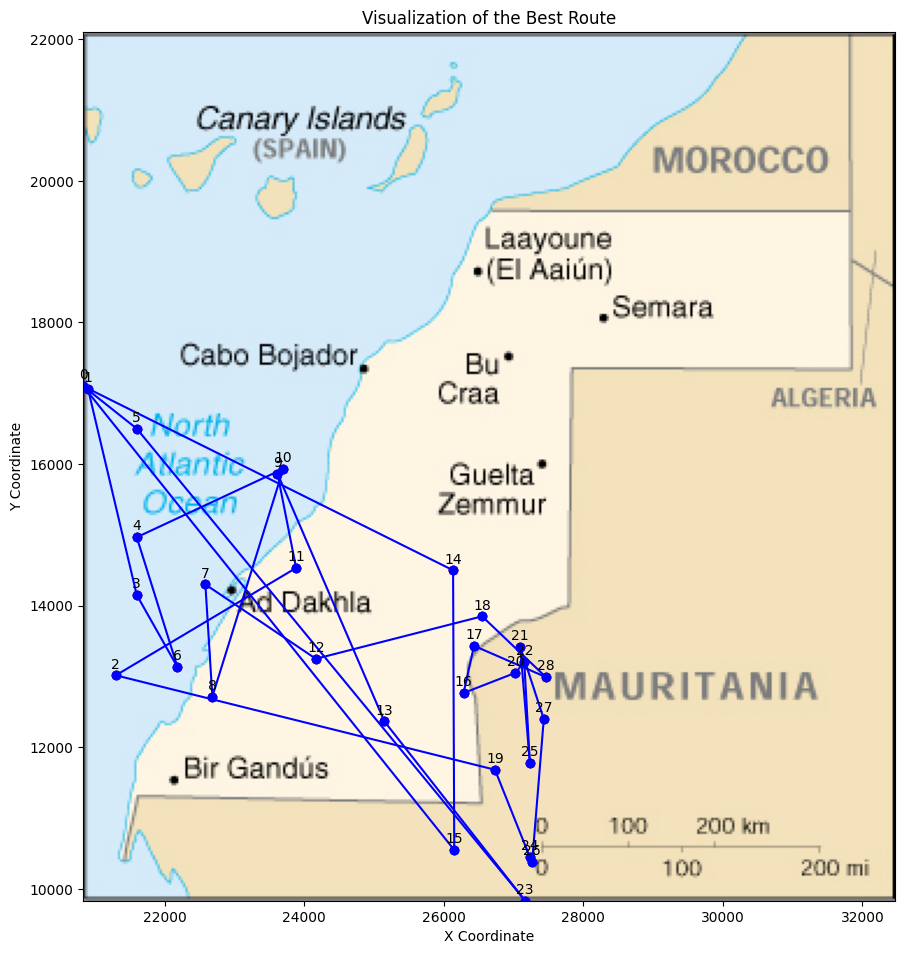

In [ ]:
# Extract x and y coordinates from the route
x_coords = [coordinates[i][1] for i in best_route]
y_coords = [coordinates[i][2] for i in best_route]

print("X Coordinates: ", x_coords)
print("Y Coordinates: ", y_coords)

# Load the map image
img = mpimg.imread('/content/drive/MyDrive/wimap.jpg')

# Get image dimensions (height and width)
height, width, _ = img.shape

# Set the figure size based on image dimensions
scaling_factor = 3.0
figsize = (width / 100.0 * scaling_factor, height / 100.0 * scaling_factor)

# Create a figure with the specified size
fig, ax = plt.subplots(figsize=figsize)

ax.imshow(img, extent=[min(x_coords), max(x_coords)+5000, min(y_coords), max(y_coords)+5000], aspect='auto')

# Plot the route on top of the image
for i in range(len(best_route)):
    start_city = best_route[i]
    end_city = best_route[(i + 1) % len(best_route)]
    ax.plot([coordinates[start_city][1], coordinates[end_city][1]],
            [coordinates[start_city][2], coordinates[end_city][2]], 'bo-')

# Plot the points
ax.scatter(coordinates[:, 1], coordinates[:, 2], color='red')

# Annotate the points
for i, txt in enumerate(range(len(coordinates))):
    ax.annotate(txt, (coordinates[i][1], coordinates[i][2]), textcoords="offset points", xytext=(0, 5), ha='center')

# Set axis labels and title
ax.set_title('Visualization of the Best Route')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
plt.show()

### Convergence of Best Fitness

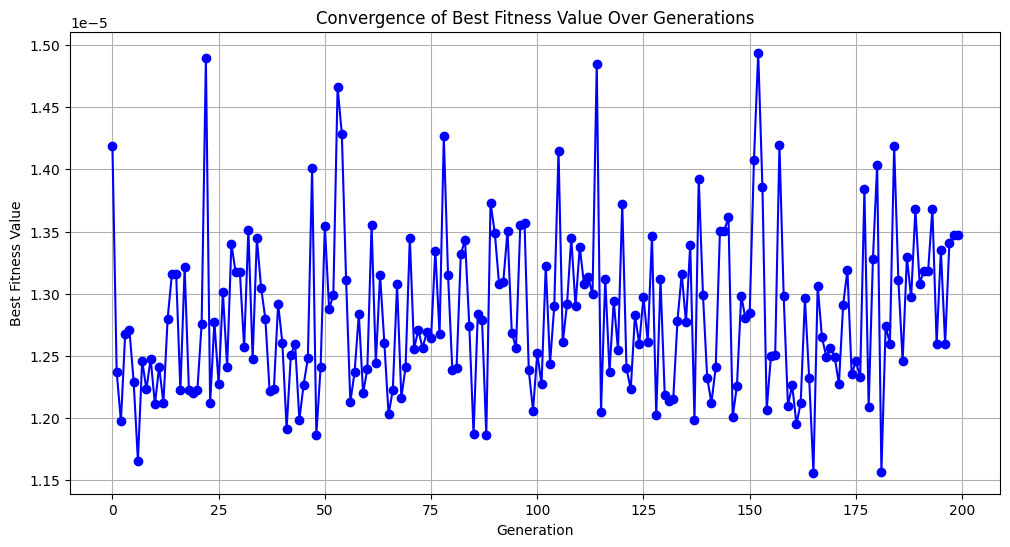

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(list(range(GENERATIONS)), best_fitnesses, marker='o', linestyle='-', color='b')
plt.title('Convergence of Best Fitness Value Over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()

### Total Distance

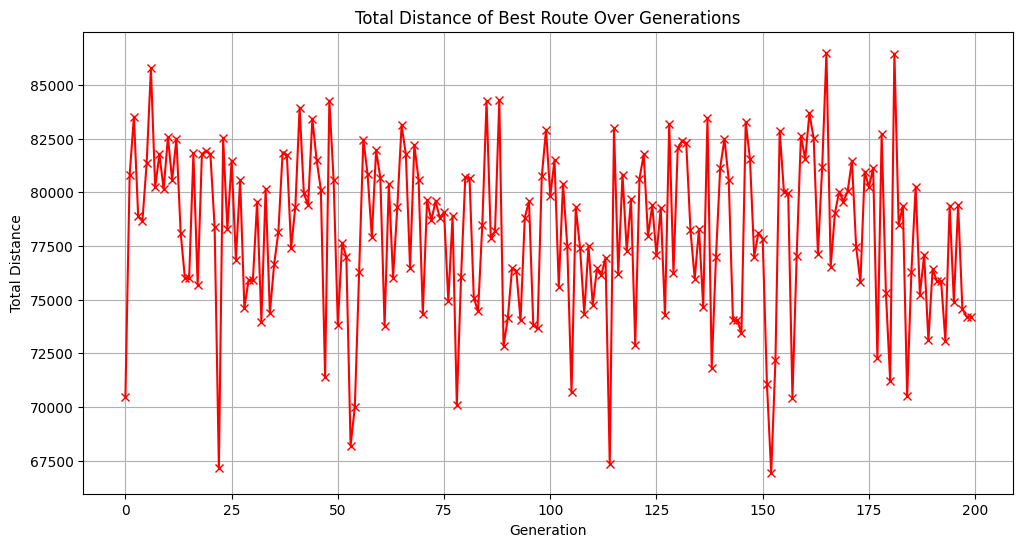

In [ ]:
total_distances = [1 / fitness for fitness in best_fitnesses]
plt.figure(figsize=(12, 6))
plt.plot(list(range(GENERATIONS)), total_distances, marker='x', linestyle='-', color='r')
plt.title('Total Distance of Best Route Over Generations')
plt.xlabel('Generation')
plt.ylabel('Total Distance')
plt.grid(True)
plt.show()

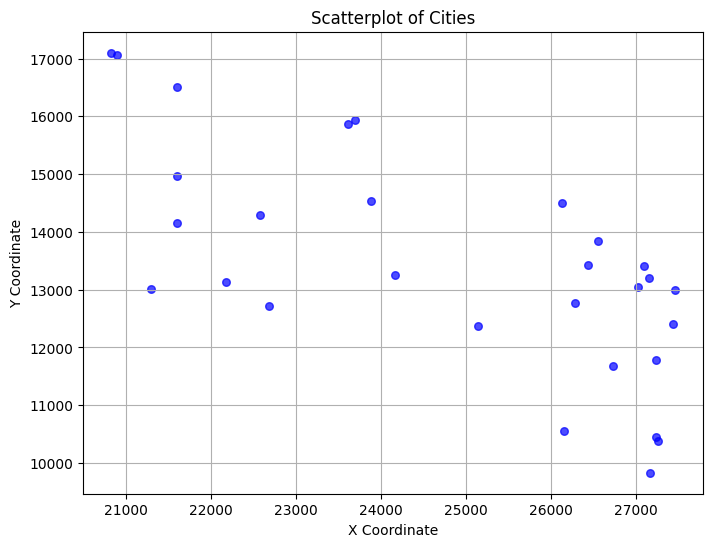

In [ ]:
x_coords = coordinates[:, 1]
y_coords = coordinates[:, 2]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color='blue', s=30, marker='o', alpha=0.7)

# Add labels and title
plt.title('Scatterplot of Cities')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Show grid
plt.grid(True)

# Show plot
plt.show()

X Coordinates:  [26733.3333, 27233.3333, 27266.6667, 27433.3333, 27096.1111, 27233.3333, 27153.6111, 27026.1111, 26283.3333, 26433.3333, 27462.5, 26550.0, 24166.6667, 22583.3333, 22683.3333, 23700.0, 21600.0, 22183.3333, 21600.0, 20900.0, 26133.3333, 26150.0, 20833.3333, 21600.0, 27166.6667, 25149.1667, 23616.6667, 23883.3333, 21300.0]
Y Coordinates:  [11683.3333, 10450.0, 10383.3333, 12400.0, 13415.8333, 11783.3333, 13203.3333, 13051.9444, 12766.6667, 13433.3333, 12992.2222, 13850.0, 13250.0, 14300.0, 12716.6667, 15933.3333, 14966.6667, 13133.3333, 14150.0, 17066.6667, 14500.0, 10550.0, 17100.0, 16500.0, 9833.3333, 12365.8333, 15866.6667, 14533.3333, 13016.6667]


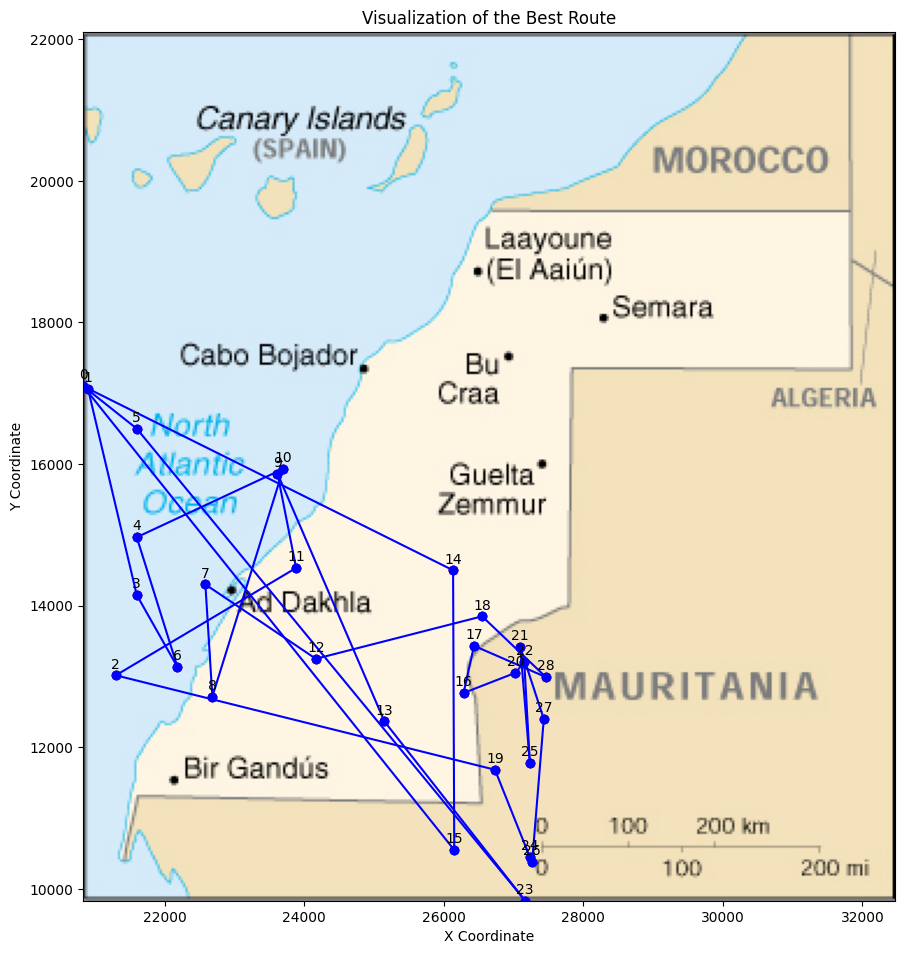

In [ ]:
# Extract x and y coordinates from the route
x_coords = [coordinates[i][1] for i in best_route]
y_coords = [coordinates[i][2] for i in best_route]

print("X Coordinates: ", x_coords)
print("Y Coordinates: ", y_coords)

# Load the map image
img = mpimg.imread('/content/drive/MyDrive/wimap.jpg')

# Get image dimensions (height and width)
height, width, _ = img.shape

# Set the figure size based on image dimensions
scaling_factor = 3.0
figsize = (width / 100.0 * scaling_factor, height / 100.0 * scaling_factor)

# Create a figure with the specified size
fig, ax = plt.subplots(figsize=figsize)

ax.imshow(img, extent=[min(x_coords), max(x_coords)+5000, min(y_coords), max(y_coords)+5000], aspect='auto')

# Plot the route on top of the image
for i in range(len(best_route)):
    start_city = best_route[i]
    end_city = best_route[(i + 1) % len(best_route)]
    ax.plot([coordinates[start_city][1], coordinates[end_city][1]],
            [coordinates[start_city][2], coordinates[end_city][2]], 'bo-')

# Plot the points
ax.scatter(coordinates[:, 1], coordinates[:, 2], color='red')

# Annotate the points
for i, txt in enumerate(range(len(coordinates))):
    ax.annotate(txt, (coordinates[i][1], coordinates[i][2]), textcoords="offset points", xytext=(0, 5), ha='center')

# Set axis labels and title
ax.set_title('Visualization of the Best Route')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Testing

In [ ]:
# Unit Testing
import unittest

GENE_SIZE = 6
MUTATION_PROBABILITY = 0.5

class TestGeneticAlgorithm(unittest.TestCase):

    def setUp(self):
        # Setup code, if any
        self.coordinates = np.array([
            [1, 314, 151],
            [2, 231, 123],
            [3, 652, 385],
            [4, 752, 355],
            [5, 947, 499],
            [6, 378, 142],
        ])
        self.route = np.array([1, 2, 3, 4, 5, 6])
        self.individual = Individual(self.route)

    def test_calculate_distance(self):
        dist = self.individual.calculate_distance(self.coordinates[0], self.coordinates[1])
        self.assertAlmostEqual(dist, 87.595661993046208) # mathematically accurate?

    def test_calculate_fitness(self):
        fitness = self.individual.calculate_fitness()
        self.assertGreater(fitness, 0) # fitness > 0?

    def test_pmx_crossover(self):
        other_route = np.array([6, 5, 4, 3, 2, 1])
        other_individual = Individual(other_route)
        child = self.individual.pmx_crossover(other_individual)
        self.assertEqual(len(child.route), len(self.route)) # same route length?

    def test_swap_mutation(self):
        original_route = self.individual.route.copy()
        self.individual.swap_mutation()
        self.assertNotEqual(list(self.individual.route), list(original_route)) # different?

test_case = TestGeneticAlgorithm()

tests = []
test_case.setUp()
try:
    test_case.test_calculate_distance()
    print("1. test_calculate_distance passed!")
    tests.append(1)
except AssertionError as e:
    print(f"test_calculate_distance failed: {e}")

test_case.setUp()
try:
    test_case.test_calculate_fitness()
    print("2. test_calculate_fitness passed!")
    tests.append(1)
except AssertionError as e:
    print(f"test_calculate_fitness failed: {e}")

test_case.setUp()
try:
    test_case.test_pmx_crossover()
    print("3. test_pmx_crossover passed!")
    tests.append(1)
except AssertionError as e:
    print(f"test_pmx_crossover failed: {e}")

test_case.setUp()
try:
    test_case.test_swap_mutation()
    print("4. test_swap_mutation passed!")
    tests.append(1)
except AssertionError as e:
    print(f"test_swap_mutation failed: {e}")

if len(tests) == 4:
    print("All tests passed!")
else:
    print("Some tests failed!")

1. test_calculate_distance passed!
2. test_calculate_fitness passed!
3. test_pmx_crossover passed!
4. test_swap_mutation passed!
All tests passed!
